# This notebook is filled with several plots I have designed over the year

/home/mldantas/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/mldantas/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:70: RuntimeWarning: divide by zero encountered in true_divide


[ 0.78171  0.7015   0.77947  0.63893  0.70759  0.64842  0.72121  0.85378
  0.74896  0.68921  0.6315   0.78811  0.65668  0.78756  0.79104  0.81383
  0.82808  0.81091  0.87032  0.79742  0.7446   0.65364  0.84078  0.66956
  0.84604  0.7307   0.68551  0.65821  0.66703  0.88299  0.86779  0.86481
  0.64915  0.68211  0.98769  0.90168  0.70277  0.71288  0.66465  0.94948
  0.79393  0.74578  0.75658  0.61387  0.70655  0.69991  0.72493  0.78801
  0.6901   0.93697  0.62812  0.62795  0.60626  0.87821  0.79487  0.80453
  0.68657  0.793    0.73591  0.72994  0.72538  0.68507  0.69947  0.87508
  0.82974  0.65649  0.6614   0.61302  0.66648  0.77892  0.65693  0.7456
  0.82736  0.84005  0.86759  0.77311  0.61942  0.61751  0.6925   0.62105
  0.72461  0.8503   0.7478   0.92019  0.80055  0.79601  0.69433  0.78807
  0.79065  0.81288  0.65755  0.60251  0.68334  0.67799  0.6455   0.70436
  0.8434   0.62321  0.77336  0.86154  0.67118  0.87761  0.62733  0.62149
  0.7638   0.73372  0.64042  0.7006   0.69097  0.752

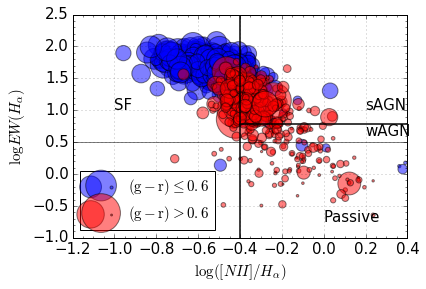

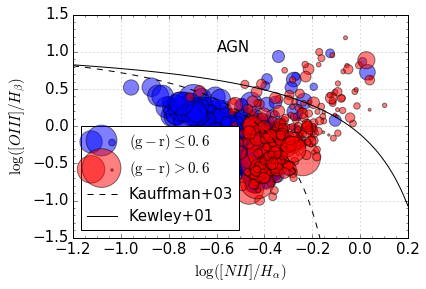

In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as s

# Main thread ----------------------------------------------------------------------------------------------------------
if __name__ == '__main__':

    data_path = '/home/mldantas/Dropbox/Python_OldButGood/outputdata_diagnostic.txt'

    plate    = np.loadtxt(data_path, usecols=[1], dtype=int)
    mjd      = np.loadtxt(data_path, usecols=[2], dtype=int)
    fiberid  = np.loadtxt(data_path, usecols=[3], dtype=int)
    ra       = np.loadtxt(data_path, usecols=[4])
    dec      = np.loadtxt(data_path, usecols=[5])
    mag_fuv  = np.loadtxt(data_path, usecols=[30])
    mag_g    = np.loadtxt(data_path, usecols=[33])
    mag_r    = np.loadtxt(data_path, usecols=[34])
    fuv_flux = np.loadtxt(data_path, usecols=[49])
    redshift = np.loadtxt(data_path, usecols=[64])
    x_whan   = np.loadtxt(data_path, usecols=[80])
    y_whan   = np.loadtxt(data_path, usecols=[81])
    x_bpt    = np.loadtxt(data_path, usecols=[83])
    y_bpt    = np.loadtxt(data_path, usecols=[84])

    # Restrictions -----------------------------------------------------------------------------------------------------
    index = np.where((redshift >= 0.05) * (redshift < 0.075) * (x_whan != 0.0) * (x_bpt != 0.0))
    index01 = np.where((redshift >= 0.05) * (redshift < 0.075) * (x_whan != 0.0))
    index02 = np.where((redshift >= 0.05) * (redshift < 0.075) * (x_bpt != 0.0))

    # BPT conditions ---------------------------------------------------------------------------------------------------
    mjd_index02        = mjd[index02]
    plate_index02      = plate[index02]
    fiberid_index02    = fiberid[index02]
    ra_index02         = ra[index02]
    dec_index02        = dec[index02]
    mag_fuv_index02    = mag_fuv[index02]
    mag_g_index02      = mag_g[index02]
    mag_r_index02      = mag_r[index02]
    fuv_flux_index02   = fuv_flux[index02]
    x_bpt_index02      = x_bpt[index02]
    y_bpt_index02      = y_bpt[index02]

    yb = 0.25 * mag_fuv_index02 - (17/4.)

    idx01b = np.where((mag_g_index02-mag_r_index02) >= yb)
    idx02b = np.where((mag_g_index02-mag_r_index02) < yb)

    fuv_flux_max02 = np.amax(fuv_flux_index02)

    markerplot01b = []
    for i in range(fuv_flux_index02.size):
        markerplot_i = 1500 * ((fuv_flux_index02[i])/fuv_flux_max02)
        markerplot01b.append(markerplot_i)
    markerplot01b = np.array(markerplot01b)

    cormaxb = np.amax(mag_g_index02 - mag_r_index02)
    markerplot02b = []
    for i in range(mag_r_index02.size):
        markerplot_i = (mag_g_index02[i] - mag_r_index02[i])/cormaxb
        markerplot02b.append(markerplot_i)
    markerplot02b = np.array(markerplot02b)

    indexx = np.where(x_bpt_index02 < 0.01)
    indexxx = np.where(x_bpt_index02 < 0.05)

    xbpt_new1 = np.linspace(-1.2, 0.05, 1000)
    xbpt_new2 = np.linspace(-1.2, 0.2, 1000)

    y1 = 0.61 / (xbpt_new1 - 0.05) + 1.3      #Kauffman03
    y2 = 0.61 / (xbpt_new2 - 0.47) + 1.19     #Kewley01

    color_opticalb = mag_g_index02 - mag_r_index02

    red_index_b = np.where(color_opticalb > 0.6)
    blue_index_b = np.where(color_opticalb <= 0.6)

    # WHAN conditions --------------------------------------------------------------------------------------------------
    mjd_index01        = mjd[index01]
    plate_index01      = plate[index01]
    fiberid_index01    = fiberid[index01]
    ra_index01         = ra[index01]
    dec_index01        = dec[index01]
    mag_fuv_index01    = mag_fuv[index01]
    mag_g_index01      = mag_g[index01]
    mag_r_index01      = mag_r[index01]
    fuv_flux_index01   = fuv_flux[index01]
    fuv_flux_index0101 = fuv_flux[index01]
    x_whan_index01     = x_whan[index01]
    y_whan_index01     = y_whan[index01]

    yw = 0.25 * mag_fuv_index01 - (17/4.)

    idx01w = np.where((mag_g_index01-mag_r_index01) >= yw)
    idx02w = np.where((mag_g_index01-mag_r_index01) < yw)

    fuv_flux_maxb = np.amax(fuv_flux_index01)

    markerplot01w = []
    for i in range(fuv_flux_index01.size):
        markerplot_i = 1500 * ((fuv_flux_index01[i])/fuv_flux_maxb)
        markerplot01w.append(markerplot_i)
    markerplot01w = np.array(markerplot01w)

    cormaxw = np.amax(mag_g_index01 - mag_r_index01)
    markerplot02w = []
    for i in range(mag_r_index01.size):
        markerplot_i = (mag_g_index01[i] - mag_r_index01[i])/cormaxw
        markerplot02w.append(markerplot_i)
    markerplot02w = np.array(markerplot02w)

    color_opticalw = mag_g_index01 - mag_r_index01

    red_index_w = np.where(color_opticalw > 0.6)
    blue_index_w = np.where(color_opticalw <= 0.6)

    print color_opticalw[red_index_w]

    print 'mjd', 'plate', 'fiberid', 'ra', 'dec'
    for i in range(ra_index01[idx01w].size):
        print int(mjd_index01[idx01w][i]), int(plate_index01[idx01w][i]), int(fiberid_index01[idx01w][i])

    # Plots ------------------------------------------------------------------------------------------------------------
    ## WHAN   ----------------------------------------------------------------------------------------------------------
    #plt.subplot(1,2,2)
    #plt.scatter(x_whan_index01[idx02w], y_whan_index01[idx02w], s = markerplot01w[idx02w], c = 'blue', alpha = 0.2)
    #plt.scatter(x_whan_index01[idx01w], y_whan_index01[idx01w], s = markerplot01w[idx01w], c = 'red', alpha = 1)
    plot1 = plt.scatter(x_whan_index01[blue_index_w], y_whan_index01[blue_index_w], s = markerplot01w[blue_index_w], c = 'blue', alpha = 0.5)
    plot2 = plt.scatter(x_whan_index01[red_index_w], y_whan_index01[red_index_w], s = markerplot01w[red_index_w], c = 'red', alpha = 0.5)
    plt.legend([plot1, plot2], [r"$\rm{(g-r) \leq 0.6}$", r"$\rm{(g-r) > 0.6}$"], numpoints= 1, loc=3, fontsize = 15)
    plt.axvline(x=-0.4, color='black', linewidth=1.5)
    plt.axhline(y=+0.5, color='black', linewidth=0.5)
    plt.axhline(y=0.78, xmin=0.5, xmax=1., color='black', linewidth=1.5)
    plt.xlabel(r"$\log ([NII]/H_{\alpha})$", fontweight='bold', fontsize = 15)
    plt.ylabel(r"$\log EW(H_{\alpha})$", fontweight='bold', fontsize = 15)
    plt.text(+0.0, -0.75, r"Passive", fontsize=15)
    plt.text(0.2, 1.0, r"sAGN", fontsize=15)
    plt.text(0.2, 0.6, r"wAGN", fontsize=15)
    plt.text(-1.0, 1.00, r"SF", fontsize=15)
    plt.xlim([-1.2, 0.4])
    plt.ylim([-1.0, 2.5])
    plt.minorticks_on()
    plt.tick_params('both', labelsize='15')
    plt.grid(alpha=0.5)
    # for i in range(mag_fuv_index01[idx01w].size):
    #     plt.annotate((plate[index01][idx01w][i], mjd[index01][idx01w][i], fiberid[index01][idx01w][i]), xy = (x_whan_index01[idx01w][i], y_whan_index01[idx01w][i]),
    #                  xytext = (30,35+(1+i**2.5)), textcoords = 'offset points', ha = 'left', va = 'bottom',
    #                  bbox = dict(boxstyle = 'round,pad=0.4', fc = 'white', alpha = 1.), arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3, rad=0', color='red', alpha=0.5), size=20, fontweight='bold')
    # plt.annotate((plate[index01][idx01w][4], mjd[index01][idx01w][4], fiberid[index01][idx01w][4]), xy = (x_whan_index01[idx01w][4], y_whan_index01[idx01w][4]),
    #              xytext = (30,30+(1+i**2.5)), textcoords = 'offset points', ha = 'right', va = 'top',
    #              bbox = dict(boxstyle = 'round,pad=0.4', fc = 'white', alpha = 1.), arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3, rad=1', color='red', alpha=0.5))
    plt.show()

    ## BPT    ----------------------------------------------------------------------------------------------------------
    #plt.subplot(1,2,1)
    #plot1 = plt.scatter(x_bpt_index02[idx02b], y_bpt_index02[idx02b], s = markerplot01b[idx02b], c = 'blue', alpha = 0.2)
    #plot2 = plt.scatter(x_bpt_index02[idx01b], y_bpt_index02[idx01b], s = markerplot01b[idx01b], c = 'red', alpha = 1)
    plot1 = plt.scatter(x_bpt_index02[blue_index_b], y_bpt_index02[blue_index_b], s = markerplot01b[blue_index_b], c = 'blue', alpha = 0.5)
    plot2 = plt.scatter(x_bpt_index02[red_index_b], y_bpt_index02[red_index_b], s = markerplot01b[red_index_b], c = 'red', alpha = 0.5)
    plot3, = plt.plot(xbpt_new1, y1, '--', color='black')
    plot4, = plt.plot(xbpt_new2, y2, '-', color='black')
    plt.xlabel(r"$\log ([NII]/H_{\alpha})$", fontweight='bold', fontsize = 15)
    plt.ylabel(r"$\log ([OIII]/H_{\beta})$", fontweight='bold', fontsize = 15)
    plt.legend([plot1, plot2, plot3, plot4], [r"$\rm{(g-r) \leq 0.6}$", r"$\rm{(g-r) > 0.6}$", "Kauffman+03", "Kewley+01"],  numpoints=1, loc=3, fontsize = 15)
    plt.text(-0.8, -0.5, r"SF", fontsize=15)
    plt.text(-0.6, 1.0, r"AGN", fontsize=15)
    plt.xlim([-1.2, 0.2])
    plt.ylim([-1.5, 1.5])
    plt.minorticks_on()
    plt.tick_params('both', labelsize='15')
    plt.grid(alpha=0.5)
    # for i in range(mag_fuv_index02[idx01b].size):
    #     plt.annotate((plate[index02][idx01b][i], mjd[index02][idx01b][i], fiberid[index02][idx01b][i]),
    #                  xy = (x_bpt_index02[idx01b][i], (y_bpt_index02[idx01b][i])), xytext = (-30+15*i,30+15*i),
    #                  textcoords = 'offset points', ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round,pad=0.4',
    #                                                                                         fc = 'white', alpha = 1.0),
    #                  arrowprops = dict(arrowstyle = 'wedge', connectionstyle = 'arc3, rad=0', color='red', alpha=0.5),
    #                  size=20, fontweight='bold')
    # plt.tight_layout()
    plt.show()
